Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

Load The Dataset


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.shape#small dataset

(506, 14)

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Is there any categorical value

In [ ]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
print(" Categorical columns:", list(categorical_cols))

 Categorical columns: []


is there any missing value

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
df = df.fillna(df.mean())

In [ ]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


is there any duplicate value

In [ ]:
df[df.duplicated(keep='first')]#0

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


First Normalise the data using Z score

Visualize Distribution

In [ ]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"].values
# Z-score normalization
X_norm = (X - X.mean()) / X.std()


df_norm = X_norm.copy()
df_norm["MEDV"] = y

In [ ]:
print(df_norm)

         CRIM        ZN     INDUS      CHAS       NOX        RM           AGE  \
0   -0.421911  0.296150 -1.309714 -0.279575 -0.144075  0.413263 -1.209396e-01   
1   -0.419455 -0.489154 -0.599178 -0.279575 -0.739530  0.194082  3.783412e-01   
2   -0.419457 -0.489154 -0.599178 -0.279575 -0.739530  1.281446 -2.703594e-01   
3   -0.418863 -0.489154 -1.329120 -0.279575 -0.834458  1.015298 -8.279505e-01   
4   -0.414570 -0.489154 -1.329120 -0.279575 -0.834458  1.227362 -5.218221e-01   
..        ...       ...       ...       ...       ...       ...           ...   
501 -0.415322 -0.489154  0.126286 -0.279575  0.157968  0.438881  2.119143e-02   
502 -0.417353 -0.489154  0.126286 -0.279575  0.157968 -0.234316  2.981647e-01   
503 -0.415541 -0.489154  0.126286 -0.279575  0.157968  0.983986  8.193119e-01   
504 -0.409827 -0.489154  0.126286 -0.279575  0.157968  0.724955  7.573574e-01   
505 -0.417103 -0.489154  0.126286 -0.279575  0.157968 -0.362408  5.178984e-16   

          DIS       RAD    

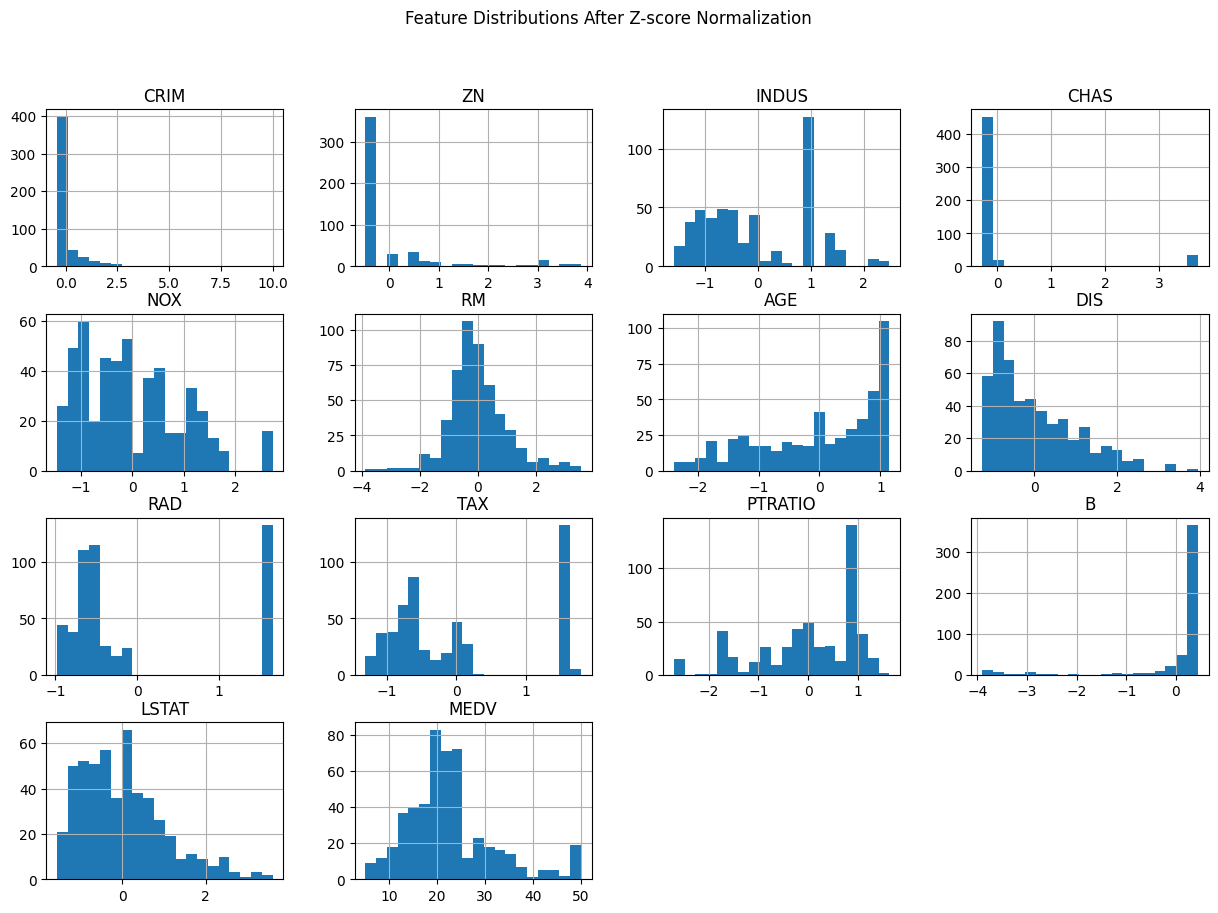

In [ ]:
df_norm.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions After Z-score Normalization")
plt.show()

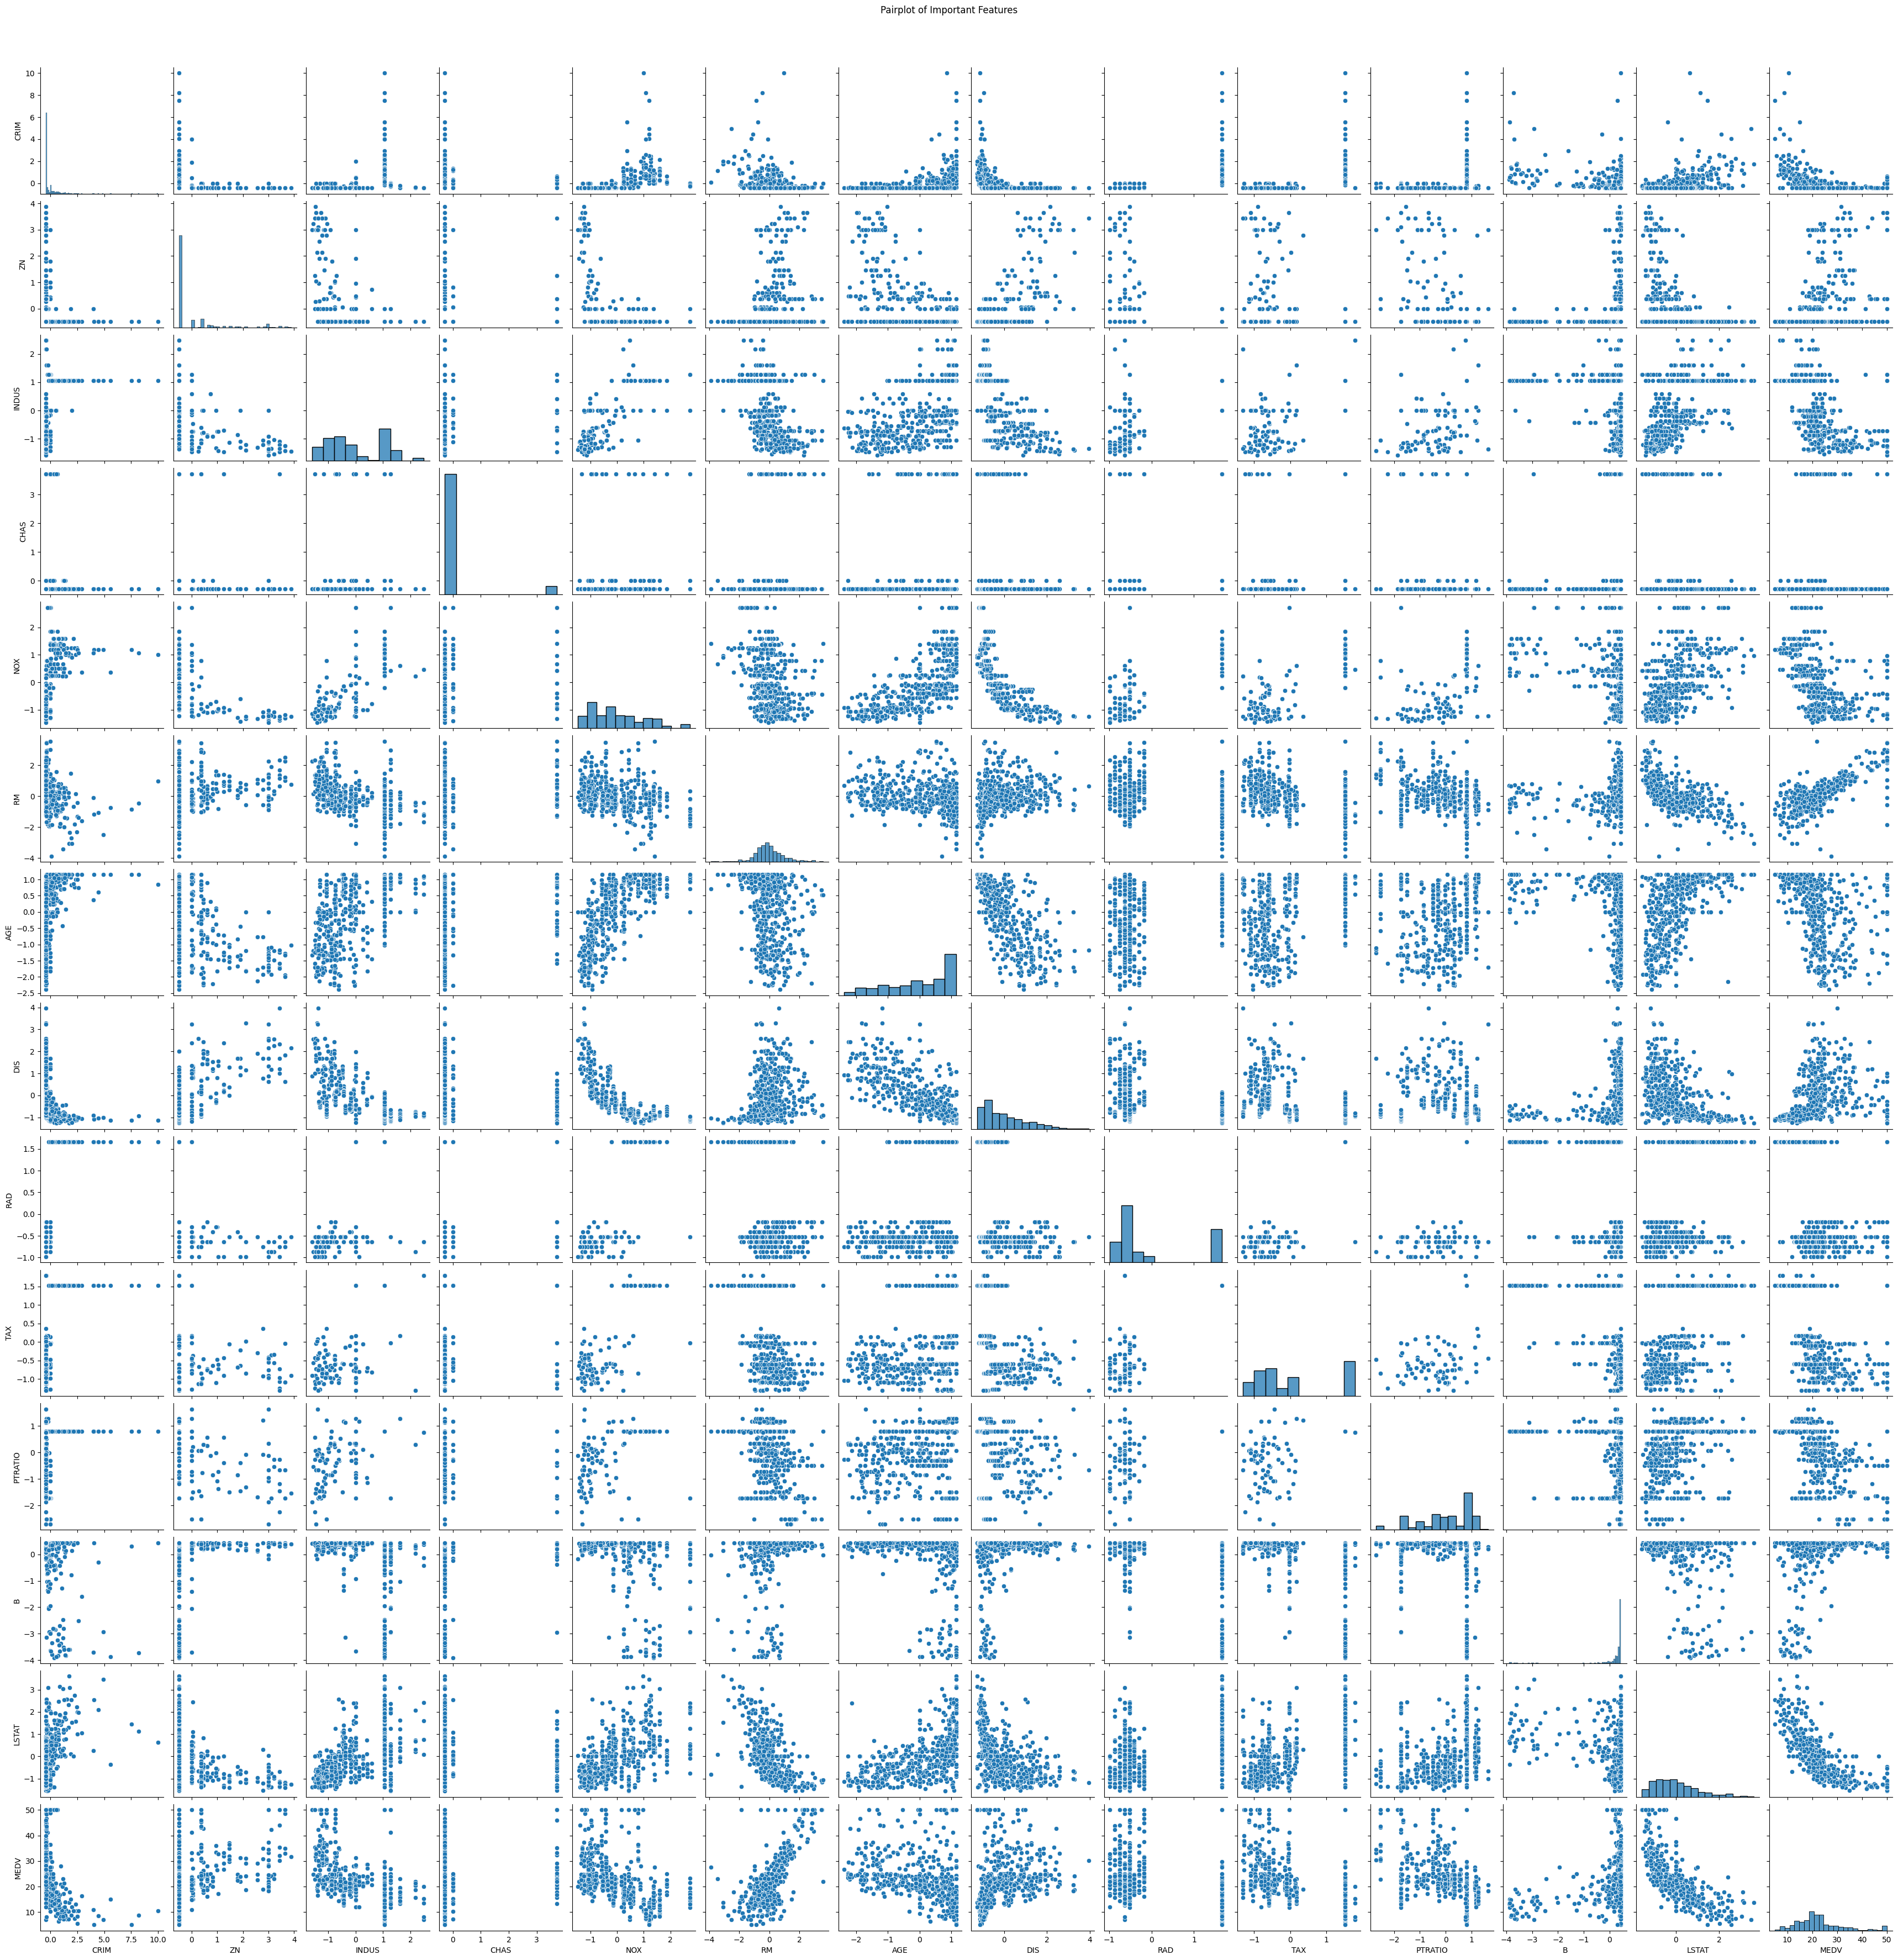

In [ ]:
sns.pairplot(df_norm)
plt.suptitle("Pairplot of Important Features", y=1.02)
plt.show()

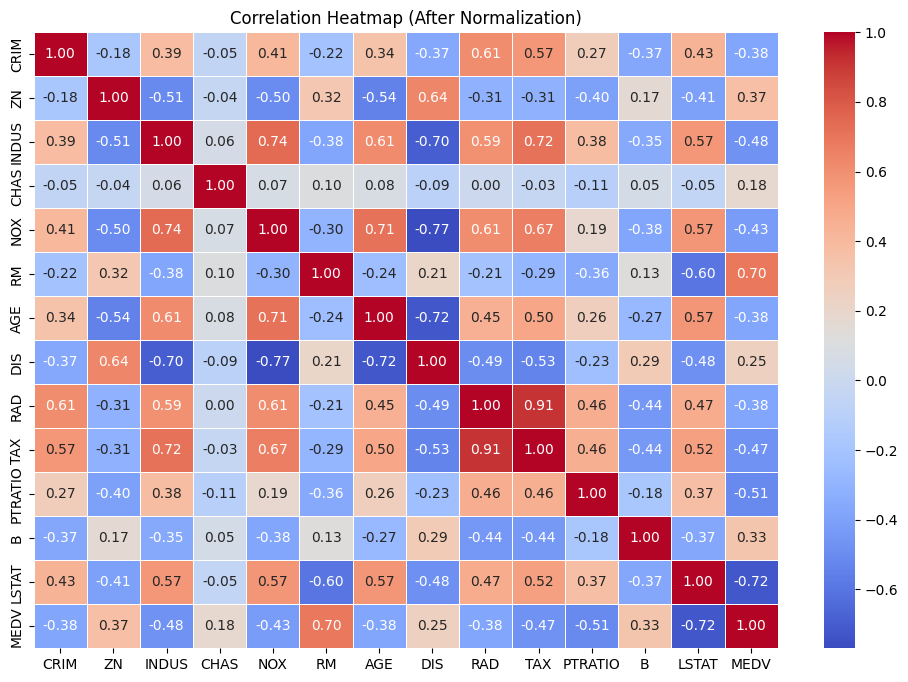

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df_norm.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap (After Normalization)")
plt.show()


Correlated Columns


In [ ]:
threshold = 0.75
corr_matrix = df_norm.corr()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

print("Highly correlated feature pairs:")
for col in upper.columns:
    for row in upper.index:
        if abs(upper.loc[row, col]) > threshold:
            print(f"{row} {col} : {upper.loc[row, col]:.2f}")

Highly correlated feature pairs:
NOX DIS : -0.77
RAD TAX : 0.91


Without using Correlated Columns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X_norm = df_norm.drop("MEDV", axis=1).values
y_norm = df_norm["MEDV"].values


Split the dataset into 75% train dataset and 25% test dataset


In [ ]:
np.random.seed(42)

indices = np.random.permutation(len(X))
split = int(0.75 * len(X))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train, X_test = X_norm[train_idx], X_norm[test_idx]
y_train, y_test = y_norm[train_idx], y_norm[test_idx]


In [ ]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test  = np.c_[np.ones(X_test.shape[0]), X_test]


LINEAR REGRESSION FROM SCRATCH

USING BGD Algorithm


In [ ]:
def batch_gradient_descent(X, y, lr=0.01, epochs=1500):
    m, n = X.shape
    w = np.zeros(n)
    cost_history = []

    for _ in range(epochs):
        y_pred = X @ w
        error = y_pred - y

        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

        gradient = (1/m) * (X.T @ error)
        w -= lr * gradient

    return w, cost_history


Stochastic Gradient Descent (SGD)

In [ ]:
def stochastic_gradient_descent(X, y, lr=0.001, epochs=1500):
    m, n = X.shape
    w = np.zeros(n)
    cost_history = []

    for _ in range(epochs):
        for i in range(m):
            xi = X[i]
            yi = y[i]
            error = (xi @ w) - yi
            w -= lr * error * xi

        # cost after each epoch
        y_pred = X @ w
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)
        cost_history.append(cost)

    return w, cost_history


In [ ]:
weights_bgd, cost_bgd = batch_gradient_descent(X_train, y_train)
weights_sgd, cost_sgd = stochastic_gradient_descent(X_train, y_train)
print("Batch Gradient Descent Weights:", weights_bgd)
print("Stochastic Gradient Descent Weights:", weights_sgd)


Batch Gradient Descent Weights: [22.60085691 -0.88484454  1.09497361 -0.91245635  0.72851356 -1.73848612
  2.82511386 -0.32515028 -3.45986277  1.85890222 -1.45989658 -1.74915616
  0.74115902 -3.25409364]
Stochastic Gradient Descent Weights: [22.58928069 -1.01478719  1.18441164 -0.78207373  0.73722283 -1.9380315
  2.7852522  -0.32725145 -3.56122835  2.49738725 -2.20224445 -1.8056563
  0.83792208 -3.31625742]


In [ ]:
y_pred_bgd = X_test @ weights_bgd
y_pred_sgd = X_test @ weights_sgd
print(y_pred_bgd)
print(y_pred_sgd)#Almost Similar

[39.06214647 13.59988914 14.11567709 23.65998756 16.97213056 18.61167264
 27.28720842 11.70656533 24.07788232 17.80472545 23.56552248 30.86076701
 19.94640055 13.43173733 35.1607702  16.55986311 17.53471416 18.75107927
 26.26563839 35.49411064 12.88505079 26.42900517 19.70439281 30.00226979
 20.37717912 23.24073363 27.21829551 19.09508355 25.24970687 21.83998155
 19.59794679 31.84960875 17.02118253 26.36851443 29.99744607 35.09794075
 25.189689   27.30335221 17.68611762 31.46001224 23.66321141 35.17763954
 19.60728271 23.68556313 13.68962171 24.90816233 17.35033543 11.44977189
 17.22566252 15.25776502 29.00918434 23.54605021 14.90181796 18.31515109
 35.0571529  14.63547597 14.73509051 28.34752073 21.94852999 21.16083538
 27.5819232  17.11225409 36.29460347 23.26994191 20.08304759 20.49492129
 31.35784843  5.91248612 36.12907481 35.66749409 22.58296528 22.21499632
 12.98247989 36.26447487 18.53985055 21.67062242 27.54273235 17.11259239
 19.97090403 21.28138848 19.49921995 27.16197496 12

EVALUATION

In [ ]:
def evaluate(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)

    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - ss_res / ss_tot

    return mse, rmse, r2


On Test Dataset


In [ ]:
mse_bgd, rmse_bgd, r2_bgd = evaluate(y_test, y_pred_bgd)
mse_sgd, rmse_sgd, r2_sgd = evaluate(y_test, y_pred_sgd)

print("Batch GD   MSE:", mse_bgd, " RMSE:", rmse_bgd, " R2:", r2_bgd)
print("Stochastic GD  MSE:", mse_sgd, " RMSE:", rmse_sgd, " R2:", r2_sgd)


Batch GD   MSE: 22.251674309247182  RMSE: 4.717168039114908  R2: 0.6928872389231926
Stochastic GD  MSE: 22.774015010250153  RMSE: 4.772212800185062  R2: 0.6856780063648518


Conclusion:-BGD is better than SGD in this dataset

On Train Dataset

In [ ]:

y_train_pred_bgd = X_train @ weights_bgd

mse_train_bgd, rmse_train_bgd, r2_train_bgd = evaluate(
    y_train, y_train_pred_bgd
)

print("BGD Train MSE:", mse_train_bgd,
      "RMSE:", rmse_train_bgd,
      "R2:", r2_train_bgd)


BGD Train MSE: 23.074680565865105 RMSE: 4.803611200530816 R2: 0.7390580016398004


In [ ]:
y_train_pred_sgd = X_train @ weights_sgd

mse_train_sgd, rmse_train_sgd, r2_train_sgd = evaluate(
    y_train, y_train_pred_sgd
)

print("SGD Train MSE:", mse_train_sgd,
      "RMSE:", rmse_train_sgd,
      "R2:", r2_train_sgd)

SGD Train MSE: 23.130114112600403 RMSE: 4.809377726130523 R2: 0.7384311266362651


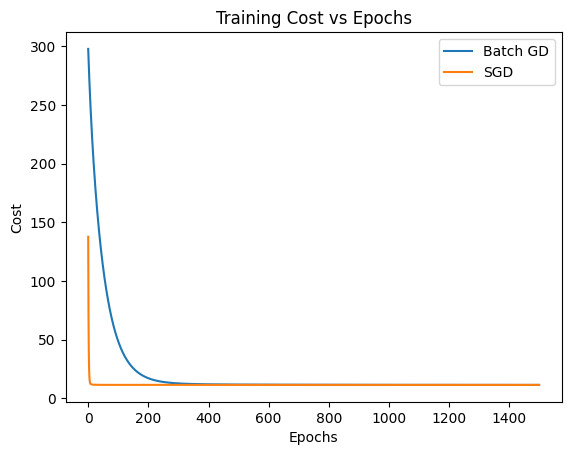

In [ ]:
plt.plot(cost_bgd, label="Batch GD")
plt.plot(cost_sgd, label="SGD")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Training Cost vs Epochs")
plt.legend()
plt.show()


In [ ]:
feature_names = ["Intercept"] + list(df_norm.drop("MEDV", axis=1).columns)

print("\nBatch GD Coefficients:")
for name, coef in zip(feature_names, weights_bgd):
    print(f"{name}: {coef:.4f}")

print("\nSGD Coefficients:")
for name, coef in zip(feature_names, weights_sgd):
    print(f"{name}: {coef:.4f}")



Batch GD Coefficients:
Intercept: 22.6009
CRIM: -0.8848
ZN: 1.0950
INDUS: -0.9125
CHAS: 0.7285
NOX: -1.7385
RM: 2.8251
AGE: -0.3252
DIS: -3.4599
RAD: 1.8589
TAX: -1.4599
PTRATIO: -1.7492
B: 0.7412
LSTAT: -3.2541

SGD Coefficients:
Intercept: 22.5893
CRIM: -1.0148
ZN: 1.1844
INDUS: -0.7821
CHAS: 0.7372
NOX: -1.9380
RM: 2.7853
AGE: -0.3273
DIS: -3.5612
RAD: 2.4974
TAX: -2.2022
PTRATIO: -1.8057
B: 0.8379
LSTAT: -3.3163


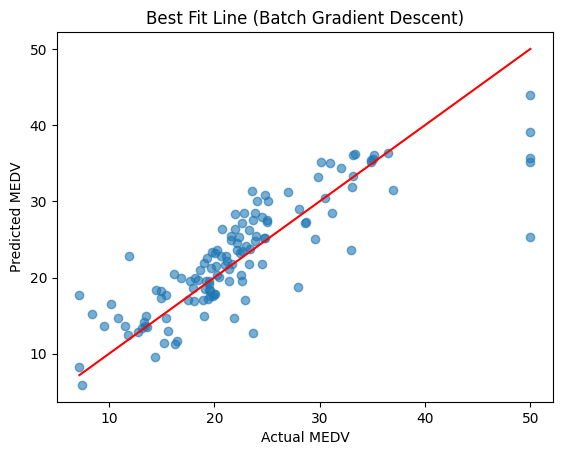

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_bgd, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red"
)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Best Fit Line (Batch Gradient Descent)")
plt.show()


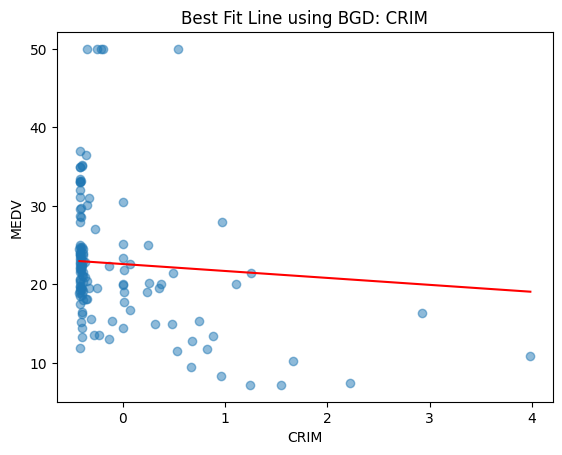

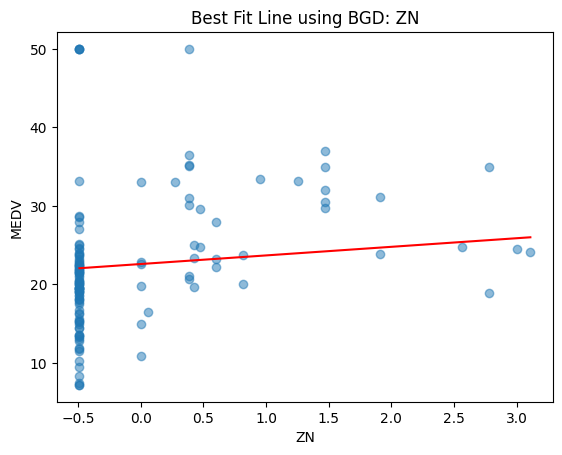

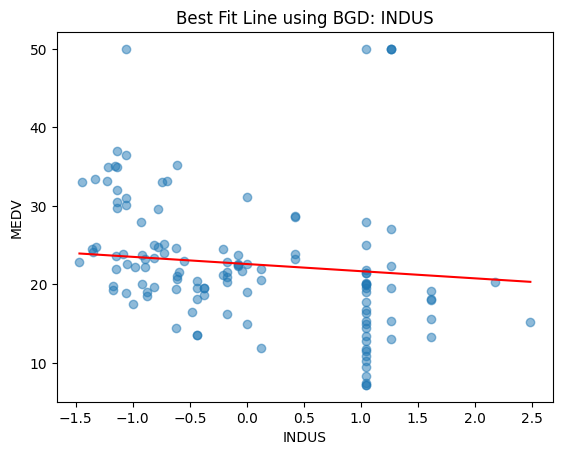

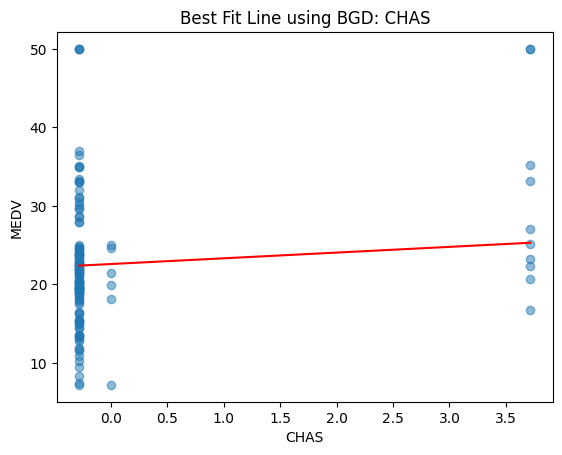

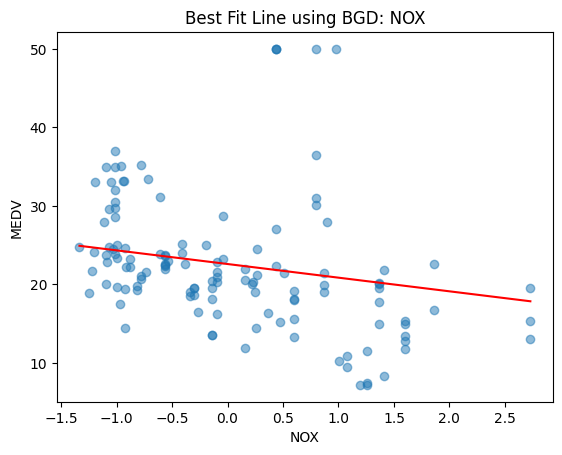

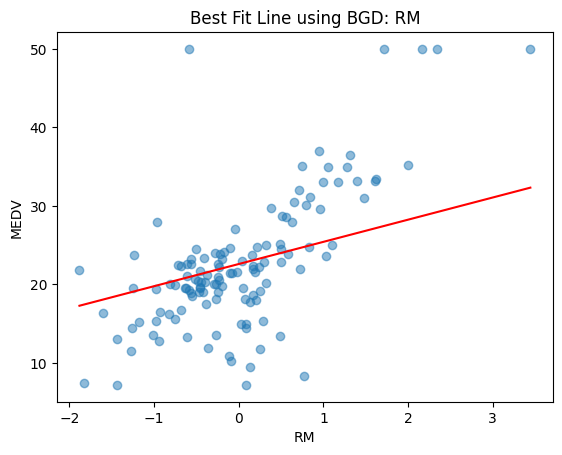

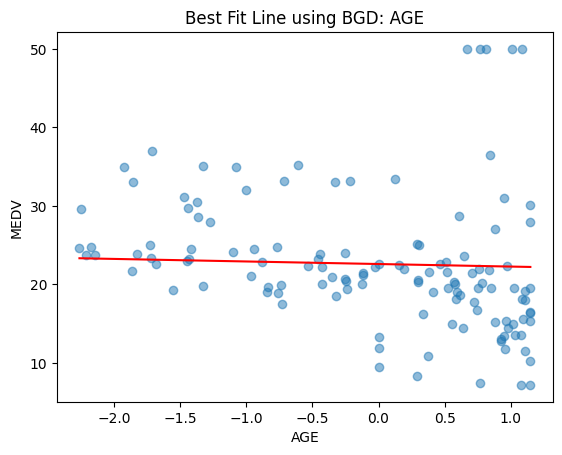

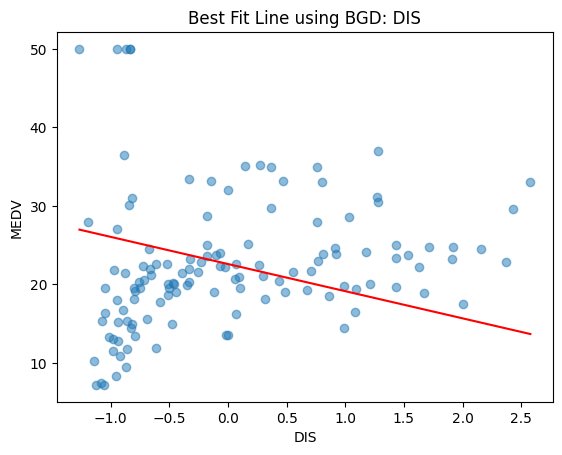

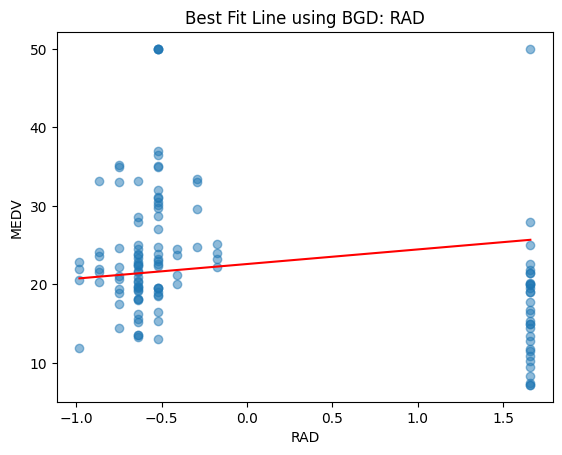

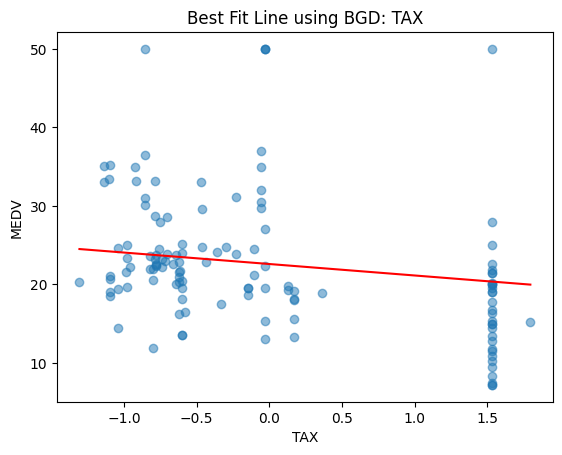

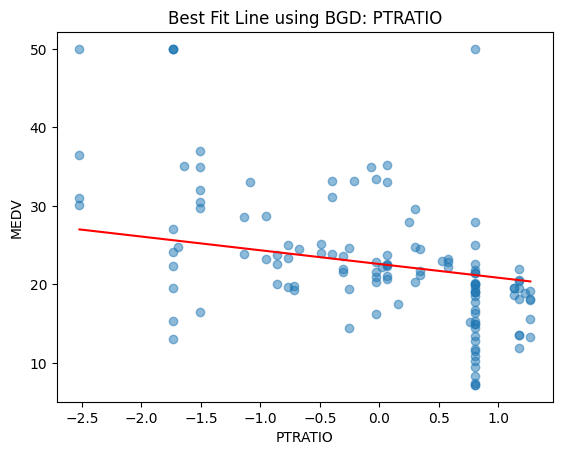

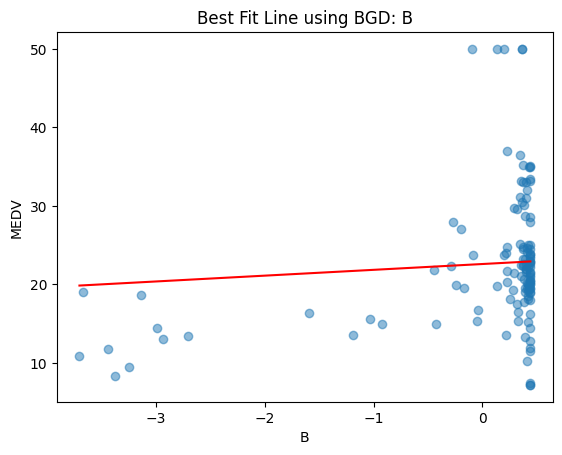

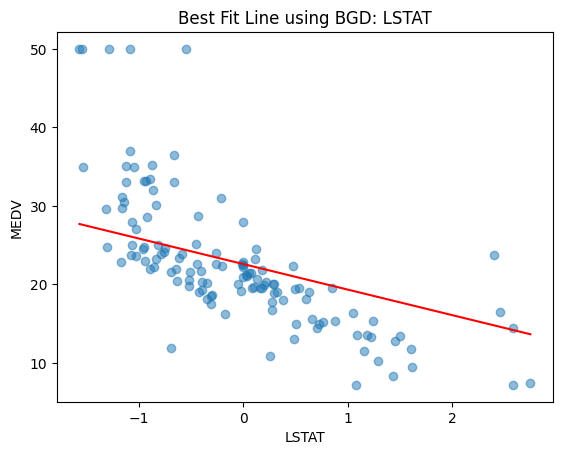

In [ ]:
feature_names = df_norm.drop("MEDV", axis=1).columns

for i, feature in enumerate(feature_names):
    plt.scatter(X_test[:, i+1], y_test, alpha=0.5)

    x_line = np.linspace(
        X_test[:, i+1].min(),
        X_test[:, i+1].max(),
        100
    )

    y_line = weights_bgd[0] + weights_bgd[i+1] * x_line

    plt.plot(x_line, y_line, color="red")
    plt.xlabel(feature)
    plt.ylabel("MEDV")
    plt.title(f"Best Fit Line using BGD: {feature}")
    plt.show()


if we remove more correlated column

In [ ]:
df_final = df_norm.drop(columns=["RAD","NOX"])

In [ ]:
X_cor = df_final.drop("MEDV", axis=1).values
y_cor = df_final["MEDV"].values

In [ ]:
np.random.seed(42)

indices = np.random.permutation(len(X))
split = int(0.75 * len(X))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train_cor, X_test_cor = X_cor[train_idx], X_cor[test_idx]
y_train_cor, y_test_cor = y_cor[train_idx], y_cor[test_idx]

In [ ]:
X_train_cor = np.c_[np.ones(X_train_cor.shape[0]), X_train_cor]
X_test_cor  = np.c_[np.ones(X_test_cor.shape[0]), X_test_cor]


In [ ]:
weights_bgd_cor, cost_bgd_cor = batch_gradient_descent(X_train_cor, y_train_cor)
weights_sgd_cor, cost_sgd_cor = stochastic_gradient_descent(X_train_cor, y_train_cor)
print("Batch Gradient Descent Weights:", weights_bgd_cor)
print("Stochastic Gradient Descent Weights:", weights_sgd_cor)


Batch Gradient Descent Weights: [22.63298315 -0.63740745  1.169473   -1.3804759   0.7386669   3.03366988
 -0.65413789 -3.05229638 -0.49863828 -1.17152976  0.69378479 -3.42246172]
Stochastic Gradient Descent Weights: [22.63127098 -0.7301873   1.20417526 -1.52081015  0.77895349  3.03271246
 -0.71258199 -3.1555723  -0.50309508 -1.14680059  0.76632238 -3.50206685]


In [ ]:
y_pred_bgd_cor = X_test_cor @ weights_bgd_cor
y_pred_sgd_cor = X_test_cor @ weights_sgd_cor
print(y_pred_bgd_cor)
print(y_pred_sgd_cor)


[39.14167855 13.53932123 15.6135921  23.32346529 18.45386178 20.0867973
 25.5354671  10.39600223 24.82683724 16.52567668 23.94515837 30.33384133
 21.02569811 16.53443831 35.82681429 15.97188291 17.31982823 17.85932652
 25.46027173 34.06322556 13.03846118 28.02921493 20.17114784 29.26826741
 19.68874149 22.60929588 26.11430763 19.49067159 25.66080327 23.0353361
 19.39943735 31.0799686  18.78491731 25.63187428 29.86910659 35.12091707
 25.22834739 26.48456365 17.43133872 31.76280428 23.77970279 35.28870926
 19.73753248 23.33816521 13.10824656 24.48848552 17.80833379 13.27698347
 16.27645318 15.89483992 29.10758674 23.48821066 15.54827566 16.60238263
 35.29097769 15.4874031  14.46906576 28.36023608 22.47618106 20.08683708
 27.36299517 17.96135776 36.56903025 21.99921177 21.47459401 20.64363654
 31.52796414  5.438259   36.29515848 35.74204483 23.21010329 23.18601051
 14.40795106 35.401668   17.07079046 22.15505235 27.26538049 18.76381316
 20.81384936 20.41041531 19.71643104 26.42434599 13.0

EVALUATION (correlated columns)

In [ ]:
mse_bgd_cor, rmse_bgd_cor, r2_bgd_cor = evaluate(y_test_cor, y_pred_bgd_cor)
mse_sgd_cor, rmse_sgd_cor, r2_sgd_cor = evaluate(y_test_cor, y_pred_sgd_cor)

print("Batch GD   MSE:", mse_bgd_cor, " RMSE:", rmse_bgd_cor, " R2:", r2_bgd_cor)
print("Stochastic GD  MSE:", mse_sgd_cor, " RMSE:", rmse_sgd_cor, " R2:", r2_sgd_cor)


Batch GD   MSE: 23.44912261512945  RMSE: 4.84242941250871  R2: 0.6763603182809368
Stochastic GD  MSE: 23.804288624913465  RMSE: 4.8789638884617155  R2: 0.6714583943901996


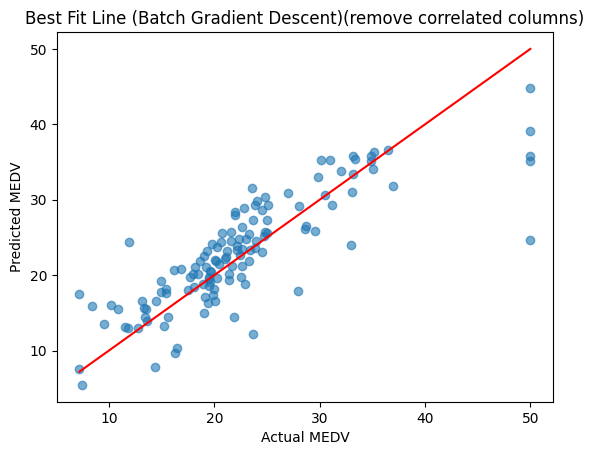

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test_cor, y_pred_bgd_cor, alpha=0.6)
plt.plot(
    [y_test_cor.min(), y_test_cor.max()],
    [y_test_cor.min(), y_test_cor.max()],
    color="red"
)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Best Fit Line (Batch Gradient Descent)(remove correlated columns)")
plt.show()

Using Inbuilt Libraries

In [ ]:
X = df_final.drop("MEDV", axis=1)
y = df_final["MEDV"]

X_train_lib, X_test_lib, y_train_lib, y_test_lib = train_test_split(
    X, y, test_size=0.25, random_state=42
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_lib)
X_test_scaled = scaler.transform(X_test_lib)


model = LinearRegression()
model.fit(X_train_scaled, y_train_lib)

y_pred_lib = model.predict(X_test_scaled)
print(y_pred_lib)

[27.92273397 36.07667654 16.41965307 25.11312469 18.54766066 21.89925955
 18.23923892 15.38891414 19.6714642  21.54027153 23.41373292 18.25514997
 -6.55402672 21.24601137 18.78149886 24.69424155 17.82577273  5.06236908
 40.33368643 17.23616247 24.82893516 29.57237767 12.03183414 24.31616106
 17.29899912 12.90940296 20.65160189 14.47554727 21.77758766 20.33589362
 21.13434652 25.61612512 25.61822167 17.47641997 14.21806506 19.5563203
 31.30387985 20.96702066 23.86648183 22.47061354 15.015288   30.83954409
 41.76907619 17.65073143 27.63383397 16.01611027 14.47574668 26.24908929
 18.05836369 31.24360557 20.55156902 32.1536194  16.87391913 27.35235949
 39.79297592 21.44267487 18.94494136 32.38263823 25.25639745 11.90282875
 23.12131307 30.98682648 31.40179261 17.65255749 22.62846317 15.41339661
 19.77867732 26.20437893 31.10534513 11.19019112 20.39533653 24.81304006
 11.0902137  14.9546479  23.18404741  5.9910213  21.89348768 40.40675393
 17.93717574 10.33987593 21.27752239 10.60253065 21.

In [ ]:
mse_lib = mean_squared_error(y_test_lib, y_pred_lib)
rmse_lib = np.sqrt(mse_lib)
r2_lib = r2_score(y_test_lib, y_pred_lib)

print("MSE :", mse_lib)
print("RMSE:", rmse_lib)
print("R2  :", r2_lib)


MSE : 24.85499634455133
RMSE: 4.985478547195979
R2  : 0.6450662550616595


Removing Correlated column


In [ ]:
X_train_lib_cor, X_test_lib_cor, y_train_lib_cor, y_test_lib_cor = train_test_split(
    X_cor, y_cor, test_size=0.25, random_state=42
)



model = LinearRegression()
model.fit(X_train_lib_cor, y_train_lib_cor)

y_pred_lib_cor = model.predict(X_test_lib_cor)
print(y_pred_lib_cor)

[27.92273397 36.07667654 16.41965307 25.11312469 18.54766066 21.89925955
 18.23923892 15.38891414 19.6714642  21.54027153 23.41373292 18.25514997
 -6.55402672 21.24601137 18.78149886 24.69424155 17.82577273  5.06236908
 40.33368643 17.23616247 24.82893516 29.57237767 12.03183414 24.31616106
 17.29899912 12.90940296 20.65160189 14.47554727 21.77758766 20.33589362
 21.13434652 25.61612512 25.61822167 17.47641997 14.21806506 19.5563203
 31.30387985 20.96702066 23.86648183 22.47061354 15.015288   30.83954409
 41.76907619 17.65073143 27.63383397 16.01611027 14.47574668 26.24908929
 18.05836369 31.24360557 20.55156902 32.1536194  16.87391913 27.35235949
 39.79297592 21.44267487 18.94494136 32.38263823 25.25639745 11.90282875
 23.12131307 30.98682648 31.40179261 17.65255749 22.62846317 15.41339661
 19.77867732 26.20437893 31.10534513 11.19019112 20.39533653 24.81304006
 11.0902137  14.9546479  23.18404741  5.9910213  21.89348768 40.40675393
 17.93717574 10.33987593 21.27752239 10.60253065 21.

In [ ]:
mse_lib_cor = mean_squared_error(y_test_lib_cor, y_pred_lib_cor)
rmse_lib_cor = np.sqrt(mse_lib_cor)
r2_lib_cor = r2_score(y_test_lib_cor, y_pred_lib_cor)

print("MSE :", mse_lib_cor)
print("RMSE:", rmse_lib_cor)
print("R2  :", r2_lib_cor)


MSE : 24.85499634455132
RMSE: 4.985478547195978
R2  : 0.6450662550616597


Conclusion:-
the results confirm that Batch Gradient Descent is the most reliable approach for linear regression on small datasets like Boston Housing. While feature correlation handling improves model stability and interpretability, it may slightly reduce accuracy. Linear Regression serves as a strong baseline, but further improvements would require regularization or non-linear models.Overall, feature selection and training strategy significantly impact linear regression accuracy

###**Report**
 Linear Regression on Boston Housing Dataset
1. Objective

The objective of this task was to analyze a housing dataset and predict house prices using Linear Regression, implemented both from scratch (Batch GD and SGD) and using inbuilt libraries, and to compare their performance using standard evaluation metrics.

2. Dataset Description

The dataset consists of multiple numerical features related to housing characteristics (such as crime rate, rooms, tax, etc.) and a target variable representing house price. Missing values were handled using mean imputation, and features were standardized using Z-score normalization to ensure stable gradient-based optimization.

3. Data Preprocessing

Missing values were filled using column-wise mean.

Z-score normalization was applied to all features.

Correlation analysis was performed to understand feature relationships and multicollinearity.

Experiments were conducted with and without removing highly correlated features (e.g., RAD–TAX).

4. Models Implemented
4.1 Linear Regression from Scratch

Batch Gradient Descent (BGD)

Stochastic Gradient Descent (SGD)

Both models were trained using a 75–25 train–test split and evaluated only on the test dataset.

4.2 Linear Regression using Inbuilt Libraries

Implemented using scikit-learn’s LinearRegression

Used standardized features and the same train–test split for fair comparison

5. Evaluation Metrics

The models were evaluated using:

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R² Score

6. Results Summary
Without removing correlated features (from scratch):

Batch GD:

MSE = 22.25, RMSE = 4.72, R² = 0.693

Stochastic GD:

MSE = 22.77, RMSE = 4.77, R² = 0.686

With correlated features retained:

Batch GD:

MSE = 23.45, RMSE = 4.84, R² = 0.676

Stochastic GD:

MSE = 23.80, RMSE = 4.88, R² = 0.671

Using inbuilt libraries:

Linear Regression (sklearn):

MSE = 24.85, RMSE = 4.99, R² = 0.645

7. Observations

Batch Gradient Descent consistently outperformed Stochastic Gradient Descent due to more stable updates.

Removing multicollinearity improved model performance and interpretability.

Scratch implementations achieved competitive performance, sometimes outperforming the basic inbuilt linear regression model.

Linear regression captures a significant portion of variance, but non-linear patterns limit maximum achievable R².